Импорт модулей и загрузка датасета

In [54]:
import pandas as pd
from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt
uploaded = files.upload()

Saving Titanic-Dataset.csv to Titanic-Dataset (1).csv


Определение количества пустых ячеек

In [55]:
data = pd.read_csv('Titanic-Dataset.csv')
print(data.head())
print(data.isnull().sum())
print(data.isnull().sum().sum())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
Pa

Таким образом видно,что в параметре Age, Cabin и Embarked есть пропущнные значения. В остальных столбацах их нет. Всего пропущенно 866 значнний. Заменим пустые значения на 0 и среднее

In [56]:
data['Age']=data['Age'].fillna(data['Age'].mean())

data=data.fillna(0)
print(data.isnull().sum().sum())
data.head()

0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


По каждому признаку произведем аналитику на количество уникальных значений и мимальное/максимальное значение


In [57]:
print(data.nunique())
print(data.max(numeric_only=True))
print(data.min(numeric_only=True))


PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             89
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          148
Embarked         4
dtype: int64
PassengerId    891.0000
Survived         1.0000
Pclass           3.0000
Age             80.0000
SibSp            8.0000
Parch            6.0000
Fare           512.3292
dtype: float64
PassengerId    1.00
Survived       0.00
Pclass         1.00
Age            0.42
SibSp          0.00
Parch          0.00
Fare           0.00
dtype: float64


Определим что влияет на параметр survived

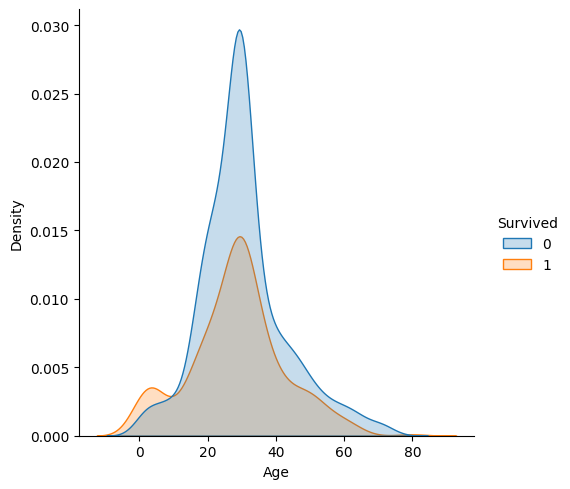

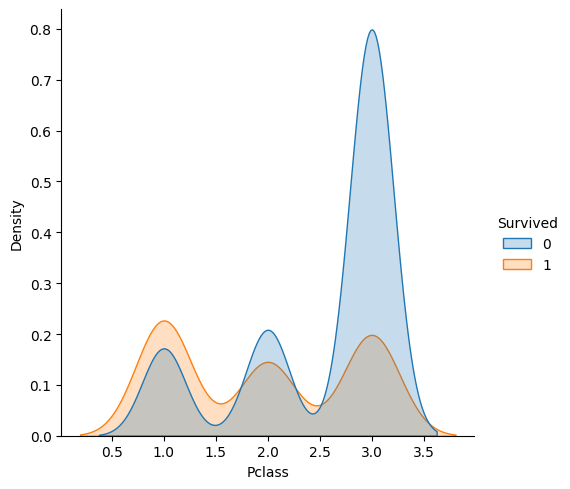

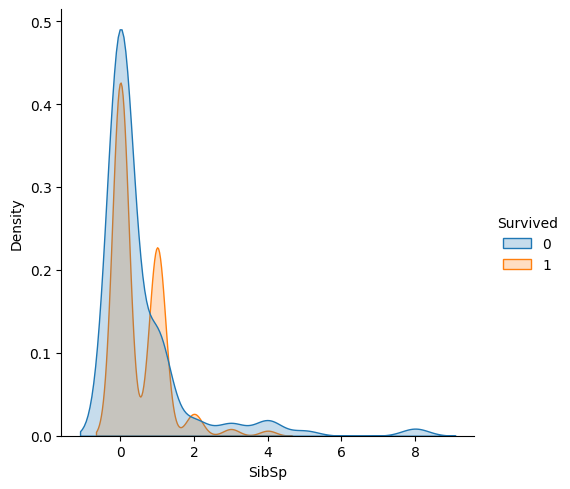

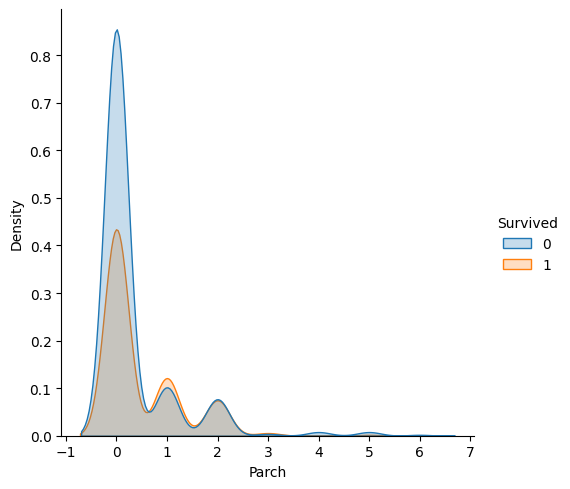

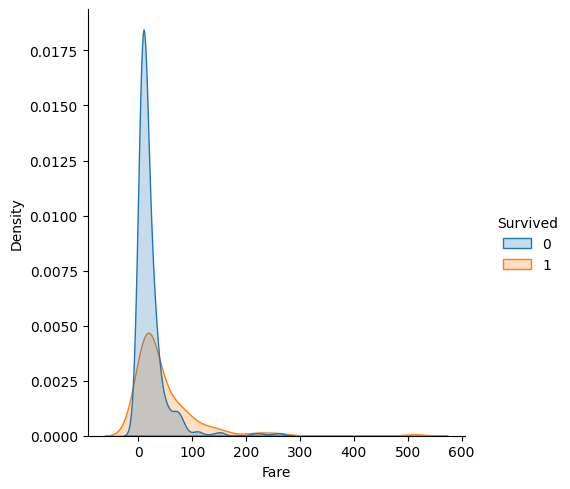

In [58]:
sns.displot(data=data, x='Age', hue='Survived', kind='kde', fill=True)
sns.displot(data=data, x='Pclass', hue='Survived', kind='kde', fill=True)
sns.displot(data=data, x='SibSp', hue='Survived', kind='kde', fill=True)
sns.displot(data=data, x='Parch', hue='Survived', kind='kde', fill=True)
sns.displot(data=data, x='Fare', hue='Survived', kind='kde', fill=True)
plt.show()

Посмотрим также на корреляцию параметров

<ipython-input-59-f56036110885>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_corr.corr(),annot = True, cmap = plt.cm.Blues)


Text(0.5, 1.0, 'Correlation Matrix')

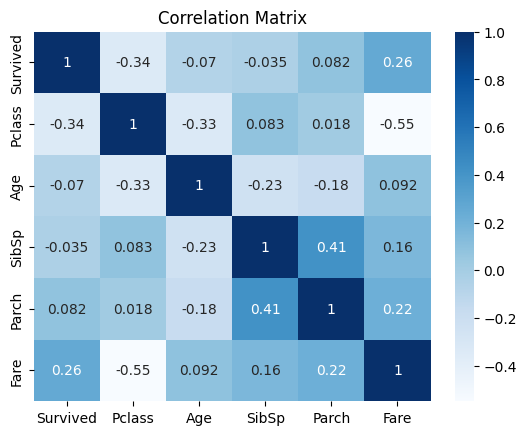

In [59]:
data_corr = data.drop(['PassengerId'], axis = 1)
sns.heatmap(data_corr.corr(),annot = True, cmap = plt.cm.Blues)
plt.title('Correlation Matrix')

Видно, что класс пассажира и цена билета сильно коррелируют с тем выжил человек или нет. Логично также преположить и это видно по матрице, что класс пассажира связан со стоимостью билета. Таким образом можно сделать вывод что чем выше был класс пасажира, тем больше была вероятность выжить. Ниже показаны дополнительная информация для подверждения

In [130]:
survived_class = data.where(data["Survived"] == 1).groupby('Pclass')['Survived'].sum()
unsurvived_class = data.groupby('Pclass')['Survived'].count()
percentage_class_survived = round((survived_class / unsurvived_class)*100)
percentage_class_survived

Pclass
1.0    63.0
2.0    47.0
3.0    24.0
Name: Survived, dtype: float64

Таким образом видно, что процент выживших по классам расчет, из первого класса выжило 63 поцента от всего 1 класса, 47 во втором  и только 24 процента людей в 3 классе выжило
